In [34]:
import numpy as np
from plotly import graph_objs as go
from scipy.optimize import curve_fit

In [77]:
# Exponential curve fitting
def curveFit(x,y0,y_max,tau):
    return y0+y_max*np.exp(-x/tau)

# Stretched Exponential curve fitting 
def Stretched_curveFit(x,y0,y_max,beta,tau):
    return y0+y_max*np.exp(-(x**beta)/tau)

In [78]:
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    # 'opacity': 0.2,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5+0.5,
        'tickwidth': 1.5+0.5,
        'ticklen': 6,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
        },
    'font':{'family':'mathjax',
            'size': 22,
            }
}

### Experimental Data Values

In [86]:
# Magnet Calibration for Big(Weak) magnet
big_distance=np.arange(0,7.5,0.5)
big_field1=np.array([2050,1790,1480,1150,860,650,480,370,290,230,180,140,120,100,80])
big_field2=np.array([1920,1810,1530,1130,830,630,480,360,290,220,180,140,120,100,80])
big_field_avg=(big_field1+big_field2)*1e-4/2.0

big_coefficient, big_covariance_matrix = curve_fit(Stretched_curveFit,big_distance,big_field_avg,absolute_sigma=False)
big_error_bars = np.sqrt(np.diag(covariance_matrix))
fitted_big_field_avg = Stretched_curveFit(big_distance,*big_coefficient)

In [91]:
# Magnet Calibration for small magnet(strong) at Center
small_center_distance=np.arange(0,8,0.5)
small_center_field1=np.array([4500,2890,1710,1000,620,400,280,190,150,110,80,70,50,40,40,30])
small_center_field2=np.array([4620,2750,1520,900,560,380,260,180,140,110,80,70,50,40,40,30])
small_center_field_avg=(small_center_field1+small_center_field2)*1e-4/2.0

small_center_coefficient, small_center_covariance_matrix = curve_fit(Stretched_curveFit,small_center_distance,small_center_field_avg,absolute_sigma=False)
small_center_error_bars = np.sqrt(np.diag(small_center_covariance_matrix))
fitted_small_center_field_avg = Stretched_curveFit(small_center_distance,*small_center_coefficient)
small_center_error_bars

array([0.00114494, 0.00321953, 0.02074637, 0.01317868])

In [90]:
# Magnet Calibration for small magnet(strong) at Periphery
small_side_distance=np.arange(0,7.5,0.5)
small_side_field1=np.array([2800,1370,850,620,440,320,240,210,170,140,120,90,80,70,60])
small_side_field2=np.array([3240,1340,910,690,530,410,310,250,210,170,130,100,90,70,60])
small_side_field3=np.array([3470,1580,960,580,430,350,300,240,200,160,130,110,90,70,60])
small_side_field4=np.array([3210,1890,1030,720,550,410,330,360,210,160,130,100,90,70,60])
small_side_field_avg=(small_side_field1+small_side_field2+small_side_field3+small_side_field4)*1e-4/4.0

small_side_coefficient, small_side_covariance_matrix = curve_fit(Stretched_curveFit,small_side_distance,small_side_field_avg,absolute_sigma=False)
small_side_error_bars = np.sqrt(np.diag(small_side_covariance_matrix))
fitted_small_side_field_avg = Stretched_curveFit(small_side_distance,*small_side_coefficient)

### Plots

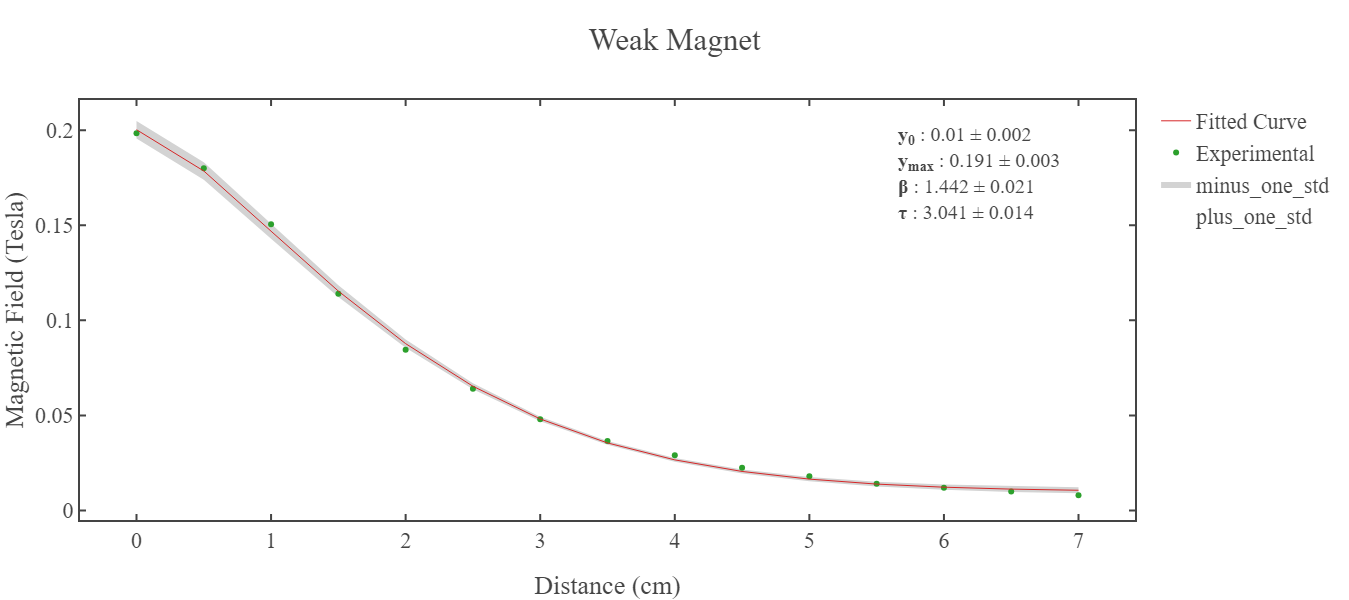

In [107]:
fig = go.Figure()

fig.add_scatter(x=big_distance,y=Stretched_curveFit(big_distance,*(big_coefficient+big_error_bars)),
                mode='lines',line=dict(width=0.01),name='plus_one_std')
fig.add_scatter(x=big_distance,y=Stretched_curveFit(big_distance,*(big_coefficient-big_error_bars)),
                mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
fig.add_scatter(x=big_distance,y=field_avg,mode='markers',line=dict(width=1),name='Experimental')
fig.add_scatter(x=big_distance,y=fitted_big_field_avg,mode='lines',line=dict(width=1),name='Fitted Curve')
fig.update_layout(template = fig_template,title="Weak Magnet",width=800,height=600)
fig.update_xaxes(title_text = "Distance (cm)"); fig.update_yaxes(title_text = "Magnetic Field (Tesla)")

fig.add_annotation(
    xref="x domain", yref="y domain",align = "left", x=0.95, y=0.95,
    text=f"<b>y<sub>0</sub></b> : {np.round(big_coefficient[0],3)} &plusmn; {np.round(big_error_bars[0],3)}\
    <br><b>y<sub>max</sub></b> : {np.round(big_coefficient[1],3)} &plusmn; {np.round(big_error_bars[1],3)}\
    <br><b>\u03B2</b> : {np.round(big_coefficient[2],3)} &plusmn; {np.round(big_error_bars[2],3)}\
    <br><b>\u03C4</b> : {np.round(big_coefficient[3],3)} &plusmn; {np.round(big_error_bars[3],3)}",
    showarrow=False, font_family="Times New Roman",font_size=20
)

fig.write_html('Weak_Magnet')
fig.show()

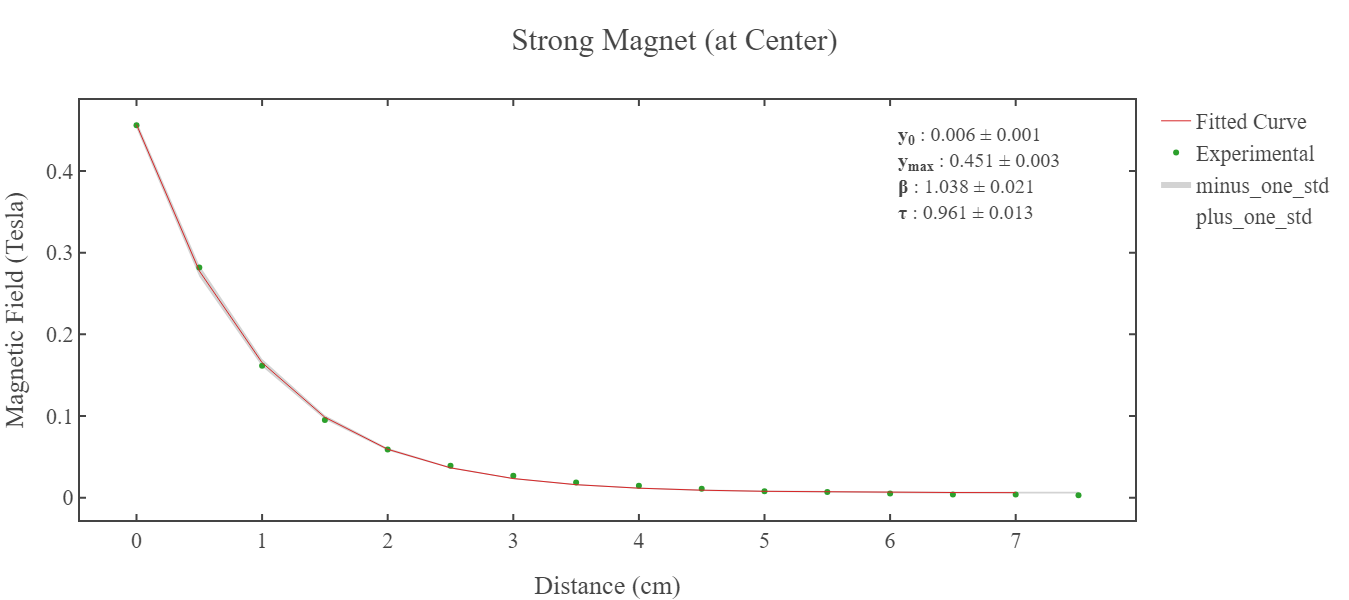

In [106]:
fig = go.Figure()

fig.add_scatter(x=small_center_distance,y=Stretched_curveFit(small_center_distance,*(small_center_coefficient+small_center_error_bars)),
                mode='lines',line=dict(width=0.01),name='plus_one_std')
fig.add_scatter(x=small_center_distance,y=Stretched_curveFit(small_center_distance,*(small_center_coefficient-small_center_error_bars)),
                mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
fig.add_scatter(x=small_center_distance,y=small_center_field_avg,mode='markers',line=dict(width=1),name='Experimental')
fig.add_scatter(x=distance,y=fitted_small_center_field_avg,mode='lines',line=dict(width=1),name='Fitted Curve')
fig.update_layout(template = fig_template,title="Strong Magnet (at Center)",width=800,height=600)
fig.update_xaxes(title_text = "Distance (cm)"); fig.update_yaxes(title_text = "Magnetic Field (Tesla)")

fig.add_annotation(
    xref="x domain", yref="y domain",align = "left", x=0.95, y=0.95,
    text=f"<b>y<sub>0</sub></b> : {np.round(small_center_coefficient[0],3)} &plusmn; {np.round(small_center_error_bars[0],3)}\
    <br><b>y<sub>max</sub></b> : {np.round(small_center_coefficient[1],3)} &plusmn; {np.round(small_center_error_bars[1],3)}\
    <br><b>\u03B2</b> : {np.round(small_center_coefficient[2],3)} &plusmn; {np.round(small_center_error_bars[2],3)}\
    <br><b>\u03C4</b> : {np.round(small_center_coefficient[3],3)} &plusmn; {np.round(small_center_error_bars[3],3)}",
    showarrow=False, font_family="Times New Roman",font_size=20
)

fig.write_html('Strong_Magnet_Center')
fig.show()

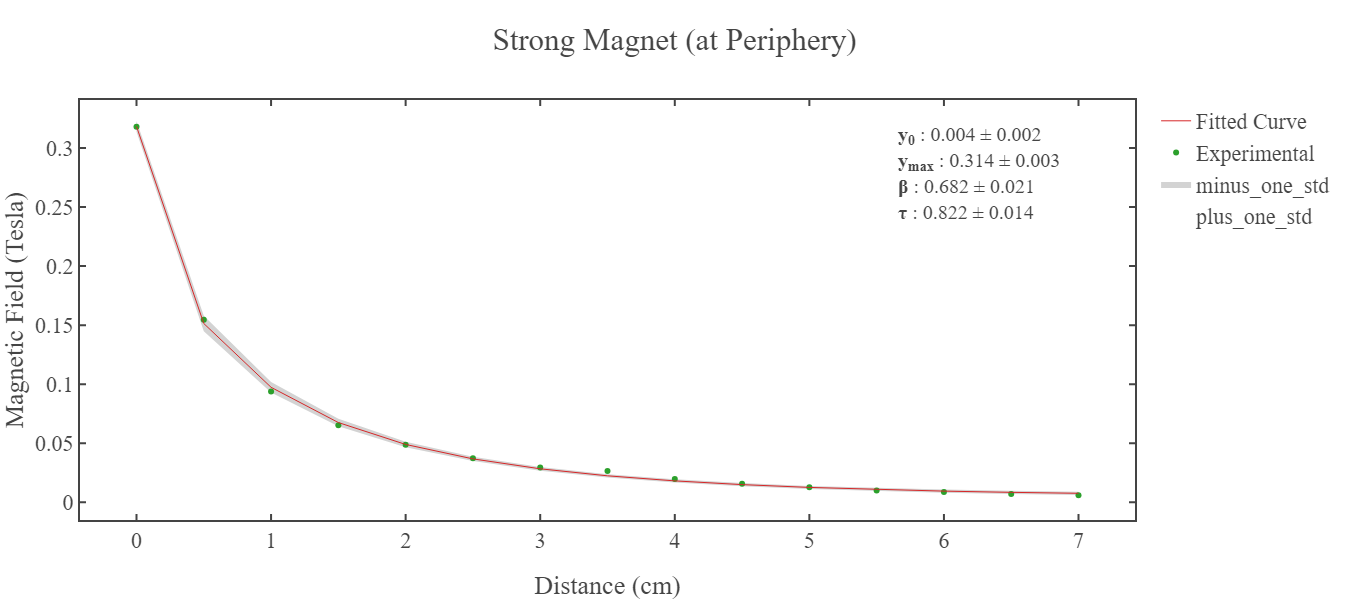

In [105]:
fig = go.Figure()

fig.add_scatter(x=small_side_distance,y=Stretched_curveFit(small_side_distance,*(small_side_coefficient+small_side_error_bars)),
                mode='lines',line=dict(width=0.01),name='plus_one_std')
fig.add_scatter(x=small_side_distance,y=Stretched_curveFit(small_side_distance,*(small_side_coefficient-small_side_error_bars)),
                mode='lines',line=dict(width=0.01),name='minus_one_std',fill='tonexty',fillcolor='rgb(211, 211, 211)')
fig.add_scatter(x=small_side_distance,y=small_side_field_avg,mode='markers',line=dict(width=1),name='Experimental')
fig.add_scatter(x=distance,y=fitted_small_side_field_avg,mode='lines',line=dict(width=1),name='Fitted Curve')
fig.update_layout(template = fig_template,title="Strong Magnet (at Periphery)",width=800,height=600)
fig.update_xaxes(title_text = "Distance (cm)"); fig.update_yaxes(title_text = "Magnetic Field (Tesla)")

fig.add_annotation(
    xref="x domain", yref="y domain",align = "left", x=0.95, y=0.95,
    text=f"<b>y<sub>0</sub></b> : {np.round(small_side_coefficient[0],3)} &plusmn; {np.round(small_side_error_bars[0],3)}\
    <br><b>y<sub>max</sub></b> : {np.round(small_side_coefficient[1],3)} &plusmn; {np.round(small_side_error_bars[1],3)}\
    <br><b>\u03B2</b> : {np.round(small_side_coefficient[2],3)} &plusmn; {np.round(small_side_error_bars[2],3)}\
    <br><b>\u03C4</b> : {np.round(small_side_coefficient[3],3)} &plusmn; {np.round(small_side_error_bars[3],3)}",
    showarrow=False, font_family="Times New Roman",font_size=20
)

fig.write_html('Strong_Magnet_Periphery')
fig.show()